In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [3]:
drug_tf_activities = pd.read_csv('../results/drug_signatures/signatures_bing_gene_dorothea.csv', sep=',', header=0,
                     index_col=0)

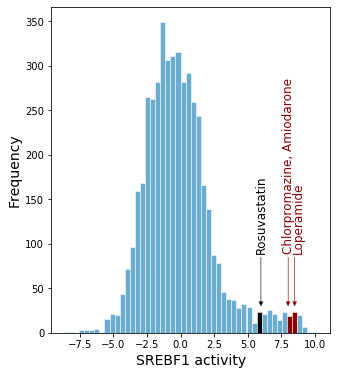

In [4]:
data = drug_tf_activities['SREBF1']
fig, ax = plt.subplots(figsize = (5,6))
N, bins, patches = plt.hist(drug_tf_activities['SREBF1'], edgecolor='white', linewidth=0.5, bins = 50, color = "#6bacd1")
loper = drug_tf_activities.loc['loperamide', 'SREBF1']
amio = drug_tf_activities.loc['amiodarone', 'SREBF1']
cp = drug_tf_activities.loc['chlorpromazine', 'SREBF1']
rosu = drug_tf_activities.loc['rosuvastatin', 'SREBF1']

for drug in [loper, amio, cp]:
    for i in range(len(bins)):
        if bins[i] > drug:
            patches[i-1].set_facecolor('darkred')
            break       
for drug in [rosu]:
    for i in range(len(bins)):
        if bins[i] > drug:
            patches[i-1].set_facecolor('black')
            break       

            
plt.arrow(rosu, 85, 0, -50, head_width=0.3, head_length=5, color='k', linewidth = 0.3)
plt.arrow(cp, 85, 0, -50, head_width=0.3, head_length=5, color='darkred', linewidth = 0.3)
plt.arrow(loper+0.1, 85, 0, -50, head_width=0.3, head_length=5, color='darkred', linewidth = 0.3)

plt.text(rosu, 92, 'Rosuvastatin', color='k', rotation = 90, ha = 'center', fontsize = 12)
plt.text(cp, 92, 'Chlorpromazine, Amiodarone', color='darkred', rotation = 90, ha = 'center', fontsize = 12)
plt.text(loper-0.1, 92,'Loperamide', color='darkred', rotation = 90, ha = 'left', fontsize = 12)

plt.xlabel('SREBF1 activity', fontsize=14)
plt.ylabel('Frequency',  fontsize=14)            
plt.show()

In [5]:
loper, amio, cp

(8.38914158803728, 8.111052198082481, 8.00115295346842)

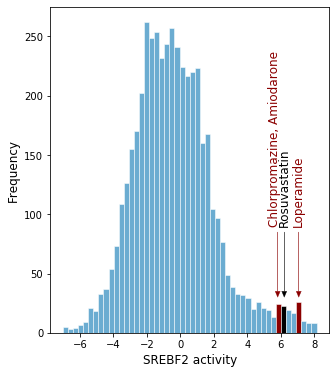

In [6]:
fig, axs = plt.subplots(figsize = (5,6))
N, bins, patches = plt.hist(drug_tf_activities['SREBF2'], edgecolor='white', linewidth=0.5, bins = 50, color = "#6bacd1")
loper = drug_tf_activities.loc['loperamide', 'SREBF2']
amio = drug_tf_activities.loc['amiodarone', 'SREBF2']
cp = drug_tf_activities.loc['chlorpromazine', 'SREBF2']
rosu = drug_tf_activities.loc['rosuvastatin', 'SREBF2']

for drug in [loper, amio, cp]:
    for i in range(len(bins)):
        if bins[i] > drug:
            patches[i-1].set_facecolor('darkred')
            break       
for drug in [rosu]:
    for i in range(len(bins)):
        if bins[i] > drug:
            patches[i-1].set_facecolor('black')
            break
            
plt.arrow(rosu+0.15, 85, 0, -50, head_width=0.3, head_length=5, color='k', linewidth = 0.3)
plt.arrow(cp-0.1, 85, 0, -50, head_width=0.3, head_length=5, color='darkred', linewidth = 0.3)
plt.arrow(loper+0.1, 85, 0, -50, head_width=0.3, head_length=5, color='darkred', linewidth = 0.3)

plt.text(rosu+0.15, 92, 'Rosuvastatin', color='k', rotation = 90, ha = 'center', fontsize = 12)
plt.text(cp+0.1, 92, 'Chlorpromazine, Amiodarone', color='darkred', rotation = 90, ha = 'right', fontsize = 12)
plt.text(loper+0.1, 92,'Loperamide', color='darkred', rotation = 90, ha = 'center', fontsize = 12)

plt.xlabel('SREBF2 activity', fontsize=12)
plt.ylabel('Frequency',  fontsize=12)            
plt.show()

# Linear models

In [7]:
drugmap = {'dmso':'DMSO', 'mbcd': 'MBCD', 'amio': 'Amiodarone', 
           'loper':'Loperamide', 'cp':'Chlorpromazine', 'rosu':'Rosuvastatin'}
colormap = {'mbcd': '#6bacd1', 'dmso':'#fc8403', 'cp':'#A92A00', 'amio': '#6447EE', 
           'loper':'#0e4179', 'rosu' : '#6d6d6d'}# 'rosu':'#EEB847'}

In [8]:
# filtered with std
exp2a = pd.read_csv('../results/cholesterol_sensor_experiments/exp2a_results_lp_std015_mp_complete.csv', index_col = 0)
exp2b = pd.read_csv('../results/cholesterol_sensor_experiments/exp2b_results_lp_std015_mp_complete.csv', index_col = 0)
exp3a = pd.read_csv('../results/cholesterol_sensor_experiments/exp3a_results_lp_std0135_mp_complete.csv', index_col = 0)
exp3b = pd.read_csv('../results/cholesterol_sensor_experiments/exp3b_results_lp_std0135_mp_complete.csv', index_col = 0)
exp3c = pd.read_csv('../results/cholesterol_sensor_experiments/exp3c_results_lp_std0135_mp_complete.csv', index_col = 0)
exp4a = pd.read_csv('../results/cholesterol_sensor_experiments/exp4a_results_lp_std015_mp_complete.csv', index_col = 0)
exp4b = pd.read_csv('../results/cholesterol_sensor_experiments/exp4b_results_lp_std015_mp_complete.csv', index_col = 0)

In [9]:
exp2a.TimePoint = exp2a.TimePoint - 4
exp3a.TimePoint = exp3a.TimePoint - 4
exp3c.TimePoint = exp3c.TimePoint + 12
exp4a.TimePoint = exp4a.TimePoint - 4

In [10]:
for exp in [exp2a, exp2b]: exp['ExpID'] = 'exp2'
for exp in [exp3a, exp3b, exp3c]: exp['ExpID'] = 'exp3'
for exp in [exp4a, exp4b]: exp['ExpID'] = 'exp4'

In [11]:
for exp in [exp2a, exp2b, exp3a, exp3b, exp3c, exp4a, exp4b]:
    exp['Time_min'] = exp['TimePoint'] * 14

In [12]:
exp2 = exp2a.append(exp2b).reset_index()
exp3bc = exp3b.append(exp3c)
exp3 = exp3bc.append(exp3a).reset_index()
exp3bc = exp3bc.reset_index()
exp4 = exp4a.append(exp4b).reset_index()

In [13]:
# exp_all
exp_all = pd.DataFrame()
for exp in [exp2, exp3, exp4]:
    exp_all = exp_all.append(exp)

In [14]:
# exp_b_all
exp_b_all = pd.DataFrame()
for exp in [exp2b, exp3bc, exp4b]:
    exp_b_all = exp_b_all.append(exp)

In [15]:
# #exp_all.to_csv('../results/cholesterol_sensor_experiments/exp_234_results.csv')

In [16]:
def prepare_for_statistics(data, time_col):
    tmp = data[data['Time_min'] <= 270].copy()
    tmp["Drug"] = pd.Categorical(tmp["Drug"],
                                categories = ["dmso", "amio", "cp", "loper","mbcd", "rosu"])
    
    return tmp

In [17]:
def statistics(data, time_col):
    
    tmp = data.copy()
    tmp = prepare_for_statistics(tmp, time_col)
    tmp.Drug = tmp.Drug.map(drugmap)
    
    model = ols(f'logRatio ~ {time_col} + {time_col} : Drug + ExpID', data=tmp).fit()

    params = model.params[model.params.index.str.contains(':')]
    pvalues = model.pvalues[model.pvalues.index.str.contains(':')]
    result = pd.DataFrame({'coeff': params.values, 'p_values':pvalues.values}, index = params.index.str.slice(16,-1))

    result = result.sort_values(by='coeff').style.format('{:,.2e}'.format)

    
    return result

In [18]:
def plot_results_timemin(data, min_y = -0.8, max_time = 270):
    tmp = data.copy()
    tmp.Drug = tmp.Drug.map(drugmap)
    fig, ax = plt.subplots(figsize = (6,6))
    plot = sns.lineplot(data=tmp, x="Time_min", y="logRatio", hue = 'Drug', palette = colormap.values())
    plt.axvline(0, color = 'r')
    plt.xticks(np.arange(-30, 21*14, 30))
    plot.set(xlim=(-30, max_time))
    plot.set(ylim=(min_y, -0.2))
    plot.set(xlabel='Time (min)')
    plt.show()

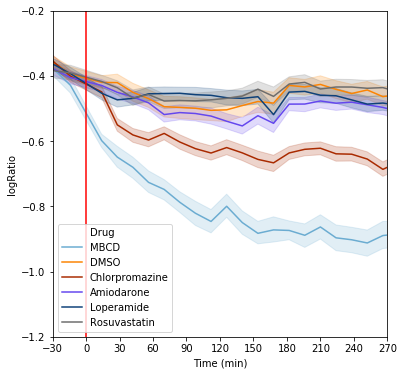

In [19]:
plot_results_timemin(exp_all, min_y = -1.2)

In [20]:
statistics(exp_b_all, 'Time_min')

,coeff,p_values
MBCD,-2.01e-03,0.00e+00
Chlorpromazine,-8.55e-04,1.22e-210
Amiodarone,-1.66e-04,2.72e-09
Loperamide,-3.24e-05,2.45e-01
Rosuvastatin,8.27e-05,4.73e-03
